# Neural network regularization and deep learning

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.in2p3.fr%2Fenergy4climate%2Fpublic%2Feducation%2Fmachine_learning_for_climate_and_energy/master?filepath=book%2Fnotebooks%2F11_intro_deep_learning.ipynb)

<div class="alert alert-block alert-warning">
    <b>Prerequisites</b>

- Neural networks
- Regularization

</div>

<div class="alert alert-block alert-info">
    <b>Learning Outcomes</b>

- Neural network regularization
- (short introduction to) Deep learning
</div>

## Neural network regularization

As soon as we start manipulating medium ($p>10^2$) or high dimensional data sets ($p >10^5$) we are always sure that the number of observation will not be high enough and there is always a risk that the model will overfit the training data (see the [Curse of dimensionality](7_unsupervised_learning_pca.ipynb#Curse-of-dimensionality)). This is especially true with neural networks because they have a lot of parameters.

Thus there is a risk that neural networks only *memorize* the training data instead of generalizing to unseen data. 

In order to illustrate and solve the overfitting problems in neural networks we are going to use a low dimensional data set with few data points so that we can do plenty of experiments. Keep in mind however that overfitting **will** occur as soon as you use a high dimensional data set.

In the figure below, we plot the case where we have $n=10$ observations of a 1-dimensional data set. We call $x$ the input feature and $y$ the output feature. The relationship between $x$ and $y$ is given by

\begin{equation}
y = x^2\, ,
\end{equation}

except that our observations are noisy: we add a Gaussian noise $\epsilon \sim \mathcal N(0,0.04)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

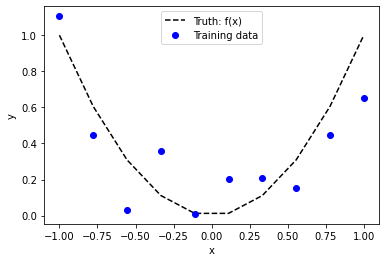

In [2]:
def f(x):
    return x**2
    
N_sample = 10
x = np.linspace(-1, 1, N_sample)
y = f(x) + np.random.normal(0., 0.2, N_sample)

plt.plot(x,f(x),'k--',label='Truth: f(x)')
plt.plot(x,y,'ob', label='Training data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

Along with this small training data set, let's build a testing data set according to the same distribution. Note that we build a testing data set is unrealistically big compared to the training data set. This is done on purpose to have converged validation metrics.

Below is a plot of the training data in blue and testing data in red.

Text(0, 0.5, 'y')

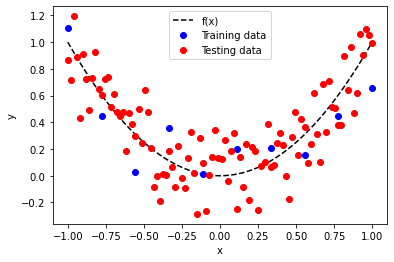

In [3]:
X_train = x[:,None]
y_train = y

N_test = 100
X_test = np.linspace(-1, 1, N_test)
y_test = f(X_test) + np.random.normal(0., 0.2, N_test)
X_test = X_test[:,None]

plt.plot(X_test,f(X_test),'k--',label='f(x)')
plt.plot(X_train,y_train,'ob', label='Training data')
plt.plot(X_test,y_test,'or', label='Testing data')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

### Early stopping

Let's use a classic fully connected neural network with 1 hidden layer of 20 neurons, tanh activation function for the hidden layer and linear output units. The loss function is the mean squared error and we choose a tolerance of $10^{-7}$ (variation of the cost function between two trainings).

In [4]:
from sklearn.neural_network import MLPRegressor

reg = MLPRegressor(hidden_layer_sizes=(20,), tol=1e-7, max_iter=20000,activation='tanh')

> - Train the network with the training data
> - Make a prediction for both the training data and testing data
> - Plot the training data
> - Plot the predicted value for the testing data

In [5]:
# your code here

> - Compute the mean squared error of the prediction for the training and testing data set.
> - Given all the information that you have, what value do you expect for the prediction error for the best model you can hope for?
> - Comment your results.

In [6]:
# your code here



With the method `partial_fit` we can do one optimization step at a time

> - Re-initialize the network with the same parameters as before
> - write a loop and store the train and test mean error at each optimization step.
> - Plot the mean squared error as a function of the iteration number for both the training and testing data set.

In [7]:
# your code here

It should be clear from the training and testing mean squared errors that there is optimum number of iteration: below that number we are underfitting and above that number, we are overfitting.

> - Re-initialize the network with the same parameters and only change the maximum number of iterations to the value you decided to fit the model just well (based on your results above)

This strategy is called early stopping.

In [8]:
# your code here


> - What are your conclusions on the prediction?
> - While doing this experiment, you should have gotten a warning from scikit-learn. What does it say? What should you do about it?

### Weight penalization

Another way to regularize neural networks is to add a weight penalization in the definition of the cost function.

> ***Question***
>
> - Explain the idea of ridge and LASSO regularization that we used for linear regression (cf. [Ridge and LASSO methods](4_regularization_selection_evaluation.ipynb))

We can make some analytical progress when we choose to penalize the coefficients with the L2 norm:

\begin{equation}
C = \frac{1}{N} \sum_n \| \mathbf{\hat y}_n - \mathbf y_n \|^2 + \alpha \sum_i w_i^2\,
\end{equation}
where the first sum it the usual mean squared error and the second sum is the sum of the squared value of all coefficients in the networks (indexed here with a simple index $i$). The coefficient $\alpha$ is the regularization coefficient.

> - How would you modify the backpropagation algorithm to handle this new term (cf. [Notebook on neural networks](9_neural_networks.ipynb))

We already showed that the ridge method tends to decrease the size of the coefficients that do not explain much of the variance. We can actually show the exact same result for neural networks (see [Goodfellow et. al (2016) chap 7]( https://www.deeplearningbook.org/contents/regularization.html ) ). Let's try to show that this penalization is equivalent to early stopping.

Suppose we are in the neighborhood of the minimum cost function $C_0$ such that

\begin{equation}
C = C_0 + \frac{1}{2}(\mathbf w - \mathbf w^*)^\top \mathbf H (\mathbf w - \mathbf w^*)
\end{equation}

where $\mathbf w^*$ corresponds to the value of the weights for which the cost function is minimum. $\mathbf H$ is a constant positive definite matrix (also called the Hessian matrix).

We initialize the weights with $\mathbf w = \mathbf w^{(0)} = 0$ and we update the weights according to the gradient descent

\begin{equation}
\mathbf w^{(n)} = \mathbf w^{(n-1)} - \lambda (\nabla C)^\top
\end{equation}

> - Compute the gradient of the cost function $\nabla C$

The eigenvectors of $\mathbf H$ verify the equation

\begin{equation}
\mathbf H \mathbf u_j = \mu_j \mathbf u_j
\end{equation}

with $\mu_j> 0$. We call $w_j$ the projection of the vector $\mathbf w$ on the eigenvector $\mathbf u_j$:

\begin{equation}
w_j = \mathbf w^\top \mathbf u_j
\end{equation}


> - What is the gradient descent equation for each component $w_j$?

> - Show that after $n$ steps, $w_j^{(n)}$ can be written as

\begin{equation}
w_j^{(n)} = \left[ 1 - (1 - \mu_j \lambda)^n)\right] w_j^*
\end{equation}

> - Show that $w_j^{(n)}$ converges to $w_j^*$ if $|1 - \mu_j \lambda|<1$.

For the components that do not explain much of the variance, $\mu_i \ll 1$. 

> - Show that for these components, we have 

\begin{equation}
w_j^{(n)} \simeq n \mu_j \lambda w_j^*
\end{equation}

We conclude that if we stop training after $n$ iterations, the component of $\mathbf w$ which will be significantly different from zero are the component that are directed in the direction of the maximum variance of $\mathbf H$. This result is similar to the ridge: the two methods are equivalent.

The figure below is the same as the one we used to illustrate gradient descent. 

> ***Question***
>
> - Describe what happens in case of early stopping
> - How are the eigenvectors of $\mathbf H$ in this figure?
> - Does early stopping mostly affects $w_1$ or $w_2$?

<img alt="gradient_descent" src="images/gradient_descent.png" width=400 style="float:center">

> - Try different values of the regularization parameter $\alpha$ in `MLPRegressor`.
> - What is the optimal value of $\alpha$ for a well trained model?

In [9]:
# your code here


In a similar way as the LASSO regularization, we can use the L1 norm to penalize the coefficients of the neural network

\begin{equation}
C = C_0 + \alpha \sum_i | w_i |\,
\end{equation}

Also like in LASSO, this strategy will actually set some weights exactly equal to zero (cf. discussion in the regularization notebook).

### Work with small networks

With the ridge and LASSO techniques, we reduce the size of the coefficients for some neurons. For our simple network that has only one single hidden layer, it means that some neurons will actually be completely useless. A strategy to get the same result would be to train a smaller network.

Le's first analyze the magnitude of the weights in your best neural network with L2 regularization.

> - Plot the magnitude of the weights of the hidden layer and the weights of the output layer.
> - How many coefficients are significantly different from 0? 
> - This should give you an indication for how to build a lightweight network that has the same behavior as the regularized network.
> - Build this new network and comment the results.


In [10]:
# your code here

### Ensemble of Network

Another strategy to regularize the solution is to train several networks. If choose  different initial conditions for all networks, we are almost sure that each network will converge to a different solution. Each network may overfit the data but in a different way and so by averaging the output of all trained network, we can get a more generic (less overfitting) solution.

### Neuron dropout

Depending on the problem we are working on, the solution of ensemble of networks may be too expensive. A similar approach is to temporarily alter the network by randomly deleting neurons. At each step of the gradient descent we remove a fraction of the neurons and rescale the other neurons so that the weighted sum remains on the same order of magnitude. 

Neuron dropout is a very popular approach and seem to really improve the regularization even if this approach does not rely on solid mathematical background. It is unfortunately not implemented in scikit-learn (see [here](10_intro_deep_learning.ipynb#Towards-more-advanced-libraries) for libraries dedicated to neural networks).

### Increase sample size

Of course, another obvious strategy is to train a model with enough samples. While this is not always possible because we are limited by our observations, we can test the idea here for our synthetic data set.

> - Increase the size of the training data set while keeping 20 neurons in the hidden layer. When the training data set is big enough, do you still overfit the data?

In [11]:
# your code here

## Deep networks

The universal approximation theorem guarantees that we can approximate any smooth function with one single hidden layer provided that this layer holds enough neurons. At the same time, the idea of adding extra layer was driven by our intuition that a network would naturally segment the problem in task and subtask (for image recognition, that could be edge recognition, pattern recognition, etc.). This strategy is also inspired by the way we build computer softwares: we first build modules to handle elementary operations and then build on top of these modules more elaborate functions. In the end we only use *high level* computer program with a cascade of layers of programs behind.


However, as you may have noticed for the perceptron experiment, the optimal weights do not carry any particular structure. And the absence of structure persists even when we train a network with more layers. Probably guided by the fact that there *should be* some structure in the weights, Yann LeCun and colleagues proposed in the late 90' to modify the architecture of neural networks. More specifically, they proposed to change the *weighted sum* in the activation function by a *convolution*.

### Convolution

Convolution is the main operation that we perform to apply a filter in image processing.

Since we only work with discrete convolution, let me skip the mathematical definition of convolution and write instead its discrete 2D form: the discrete expression of a 2D convolution is given by


\begin{equation}
g[i,j]=(f*\omega)[i,j]=\sum _{m=-\infty}^{\infty}{\sum_{n=-\infty}^{\infty}{f [i,j]\omega[i-n,j-m]}},
\end{equation}

where $g$ is the filtered image,  $f$ is the original image, $\omega$ is the filter kernel. Notice that convolution is commutative: $f*\omega$ = $\omega*f$. However in practice one of the two function is only non-zero on a small area compared to the other image (at least in image filtering). We call this function the kernel.

Below is an example of the convolution of the matrix I by the kernel K. The operation of convolution consists in sliding the kernel over the image and taking the weighted sum as indicated in the figure.

<img alt="convolution" src="images/convolution-operation-in-2D.png" width=400 style="float:center">


#### Application of convolution to blur

Below is an image of the Deep Water Horizon oil spill. There are many information in this picture and we may be interested in knowing the position of the oil spill, finding how many boats are present in this figure, etc. Let's see how we can extract information from this image with convolutions.


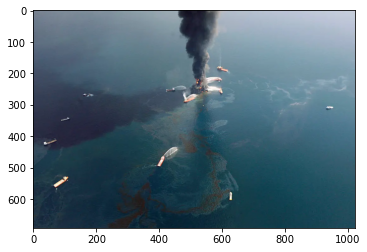

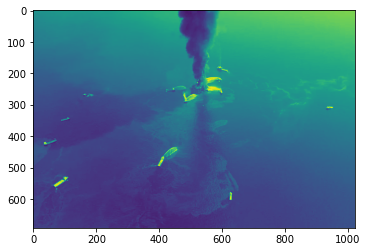

In [12]:
dwh = plt.imread('images/deep_water_horizon.png')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# image in black and white
dwh_bw = rgb2gray(dwh)

plt.imshow(dwh)
plt.figure()
plt.imshow(dwh_bw)

> - Define a kernel matrix of size $(3\times3)$ filled with ones and apply a convolution to the image above with `ndimage.convolve`
> - Plot the convolution of the original image with this kernel and comment.
> - What happens if your kernel is bigger?

In [13]:
from scipy import ndimage

# your code here


#### Application for edge detection

Some kernels are equivalent to mathematical operators. For instance the Laplace operator can be approximated by the convolution by a kernel $\mathbf K$ as shown below

\begin{equation}
\Delta \psi \simeq \mathbf K * \psi
\end{equation}

with 

\begin{align}
 \mathbf{K} &= \begin{bmatrix}
    0 & 1 & 0\\
    1 & -4 & 1\\
    0 & 1 & 0
  \end{bmatrix}
\end{align}

If you recall that the Laplace operator is a second order derivative, it will highlight small-scale structures in an image. We can use this type of convolution as an edge detection technique.

> - Try it on the image above.

In [14]:
# your code here


So the convolution operator can help us treat images in the exact same way as filters in Photoshop. We can build kernels to detect edges, we can smooth part of an image, we can sharpen an edge, etc.


### Convolutional neural networks (CNN)

The idea is then to replace the weighted sum in the activation function by the convolution. With this approach, we take advantage of the 2d structure of the image. Indeed for fully connected networks, each neuron is completely independent of its neighbors. In a convolutional neural network (CNN) this is no longer the case because of the nature of the convolution.

In CNNs the kernel plays a similar role as the weights. The key aspect of CNN is that when we do a convolution, we keep the same kernel (or weights) for the entire image. This greatly diminishes the number of parameters in our neural network.

For instance if the kernel is of size $3\times3$, we only have 9 parameters for that layer. This makes a huge difference between fully connected network and convolutional network. This difference is what opened the route to stacking many layers in a network and this is what we call today *deep learning*.

#### Common practices

In practice, each convolution is usually followed by a shrinking or *Pooling* where we group several nearby cells and take either the maximum, or mean of these cells.

At a given level, we may perform several convolutions, each time with a different kernel. The idea is to isolate different features of the input image by applying different filters. 

Usually, the last layers of CNN are traditional fully connected layers. Below are two illustration of classical network architectures.

Some architectures are known to perform well on images such as [AlexNet](https://en.wikipedia.org/wiki/AlexNet) or [VGG](https://en.wikipedia.org/wiki/File:VGG_neural_network.png). These are still empirical architecture and there is no formal proof that they should outperform other models.

<img alt="alexnet" src="images/alexnet.png" width=400 style="float:center">


### Issue with deep networks

Convolutional neural networks are usually deeper than fully connected networks because we want to do several convolutions and finally aggregate the results in the final layer.

The problem of deep networks is that they are hard to train. Let's illustrate this point with a minimalist fully connected network. 

The network below is a line of $L$ neurons connected between the input and the output (there are $L-2$ hidden layers with $1$ neuron per layer). This network cannot predict much but it will help us understand why it is hard to train a deep networks.

> - Read the code below and train this network with $L=5$.

In [15]:
# network hyper parameters
L = 5          # total length of the network (including input and output)
eta = 1e-2     # learning rate
n_epoch = 100  # number of iterations

# activation functions
def sigmoid(x):
    return (1./(1.+np.exp(-x)))

def sigmoid_prime(x):
    return sigmoid(x)*(1.-sigmoid(x))


# network structure
w = np.random.rand(L)
b = np.random.rand(L)

a = np.zeros(L)
z = np.zeros(L)
d = np.zeros(L)

dw = np.zeros(L)
db = np.zeros(L)

# input and output
x  = a[0]= 0.5
y = np.sin(x)

# training loop
for i in range(0,n_epoch):
    for l in range(1,L):
        z[l] = w[l]*a[l-1] + b[l]
        a[l] = sigmoid(z[l])

    C = 0.5*(a[-1]-y)**2

    d[-1] = np.sqrt(2*C)
    for l in range(L-2,0, -1):
        d[l] = d[l+1]*w[l+1]*sigmoid_prime(z[l])

    dw[1:] = d[1:]*a[:-1]
    db[1:] = d[1:]

    # update weights
    w -= eta*dw 
    b -= eta*db

At each iteration, all the weights are adjusted according to the gradient descent algorithm.

> - Can you monitor the evolution of the magnitude of the gradient of the cost function with respect to all weights?
> - Plot this information. It may hep to use a log scale for the $y$ axis to see the evolution (you can do this with `plt.semilogy()`)

In [16]:
# your code here

> - Derive an analytical expression for the gradient of the cost function with respect to all weights (you can use the recurrence relation that we derived in the [previous notebook](9_neural_networks.ipynb) or you can use the recurrence relation in the code above)
> - What is the maximum value of the derivative of the sigmoid?
> - If we initialize the weights with random numbers between 0 and 1, can you characterize the magnitude of the gradient as you go from the input layer to the output layer with the help of the recurrence relation?

This problem is called the *vanishing gradient problem*.

As you observed, the weights of a deep network will evolve much slower for a layer that is near the input layer during the training phase. You either need to train your model for long enough or use more elaborate methods than simple gradient descent. Another possibility is to use the ReLU activation function instead of the sigmoid.

> - Can you explain why the ReLU activation function does not suffer the vanishing gradient problem?

We describe below two modern libraries which handle all these points and which will help you tackle the problem of deep learning.

### Towards more advanced libraries

We are now at the limit of what scikit-learn can do for neural networks. If you want to study more advanced neural networks you should probably start to use [Keras](https://keras.io/) or [PyTorch](https://pytorch.org/). Note that Keras is built on top of [TensorFlow](https://www.tensorflow.org/) which is a library developed by Google to handle tensors and gradients (via automatic differentiation). Keras provides a very clean and very intuitive way to work with Neural networks. PyTorch on the other hand is more research oriented. You have full control on the architecture of the neural network. It is actively developed by FaceBook.

<img alt="keras" src="images/keras_logo.svg.png" width=200 style="float:left">

<img alt="PyTorch" src="images/pytorch-logo.png" width=200 style="float:right">


Take a moment to look at the Keras and PyTorch implementation for the image classification problem

- Keras implementation: https://keras.io/examples/vision/mnist_convnet/

- PyTorch implementation: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

### Further reading

-Autoencoder: How to use neural networks to do a Principal Component Analysis

## References

- Deep Learning, *Goodfellow, Bengio, Courville* (2016), [Chap 7](https://www.deeplearningbook.org/contents/regularization.html) and [Chap 9](https://www.deeplearningbook.org/contents/convnets.html)
- Neural Networks and Deep Learning, *Nielsen* (2019) [Chap. 3](http://neuralnetworksanddeeplearning.com/chap3.html)
- Pattern recognition and machine learning, *Bishop C. M.* (2006) Springer (Chap. 5)

***
## Credit

[//]: # "This notebook is part of [E4C Interdisciplinary Center - Education](https://gitlab.in2p3.fr/energy4climate/public/education)."
Contributors include Bruno Deremble and Alexis Tantet.

<br>

<div style="display: flex; height: 70px">
    
<img alt="Logo LMD" src="images/logos/logo_lmd.jpg" style="display: inline-block"/>

<img alt="Logo IPSL" src="images/logos/logo_ipsl.png" style="display: inline-block"/>

<img alt="Logo E4C" src="images/logos/logo_e4c_final.png" style="display: inline-block"/>

<img alt="Logo EP" src="images/logos/logo_ep.png" style="display: inline-block"/>

<img alt="Logo SU" src="images/logos/logo_su.png" style="display: inline-block"/>

<img alt="Logo ENS" src="images/logos/logo_ens.jpg" style="display: inline-block"/>

<img alt="Logo CNRS" src="images/logos/logo_cnrs.png" style="display: inline-block"/>
    
</div>

<hr>

<div style="display: flex">
    <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0; margin-right: 10px" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a>
    <br>This work is licensed under a &nbsp; <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.
</div>